<h1 align="center" style="background-color:DodgerBlue;">Desafío -  Clasificación desde Machine Learning</h1>

* Para realizar este desafío debes haber estudiado previamente todo el material disponible correspondiente a la unidad.
* Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los requerimientos solicitados y sube el .zip en el LMS.
* Desarrollo desafío:
  * El desafío se debe desarrollar de manera Individual.
  * Para la realización del desafío necesitarás apoyarte del archivo Apoyo Desafío - Clasificación desde Machine Learning.

#### Descripción

En esta sesión trabajaremos con una base de datos sobre clientes morosos de un banco.

Dentro de ésta se registran las siguientes observaciones:

* default: Variable binaria. Registra si el cliente entró en morosidad o no.
* income: Ingreso promedio declarado por el cliente.
* balance: Total de saldo en la cuenta de crédito.
* student: Variable binaria. Registra si el cliente es estudiante o no.

#### Desafío 1: Preparación del ambiente de trabajo
* Importe los módulos básicos para el análisis de datos
* Importe seaborn.
* Importe statsmodels.
* Importe LogisticRegression, train_test_split, StandardScaler, classification_report y roc_curve de sklearn.



In [13]:
# importaciones analicis exploratorio y muestreo de datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# seaborn
import seaborn as sns
# scipy stats para simular
import scipy.stats as stats
# statsmodels para modelación
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")
plt.style.use('seaborn') # Gráficos estilo seaborn
# plt.rcParams["figure.figsize"] = (6, 3) # Tamaño gráficos
# plt.rcParams["figure.dpi"] = 200 # resolución gráficos
# Regrecion Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Matriz de confusion y metricas de desempeño
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve

#### Desafío 2: Análisis exploratorio
* Explore las principales relaciones entre las variables. Utilizando los métodos boxplot y lmplot de seaborn implemente los siguientes gráficos.
  * Un boxplot del balance total de las cuentas, segmentado por el status de estudiante.
  * Un boxplot del ingreso total de cada cliente, segmentado por el status de estudiante. 
  * Un boxplot del balance total de las cuentas, segmentado por el status de default.
  * Un boxplot del ingreso total de cada cliente, segmentado por el status de default.
  * Un diagrama de dispersión entre balance e income, segmentado por el status de estudiante.
  * Un diagrama de dispersión entre balance e income, segmentado por el status de default.
<p>

* Comente brevemente sobre los principales patrones de comportamiento.

tip: Puede utilizar el argumento hue en lmplot para identificar las observaciones por status.


In [14]:
# ingresamos la base de datos
df = pd.read_csv('default_credit.csv')
df.head()

,index,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [15]:
df.shape

(10000, 5)

<AxesSubplot:xlabel='student', ylabel='balance'>

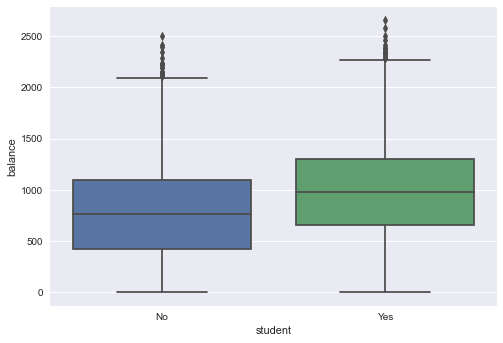

In [16]:
sns.boxplot(data = df, x = 'student', y = 'balance')

<AxesSubplot:xlabel='student', ylabel='income'>

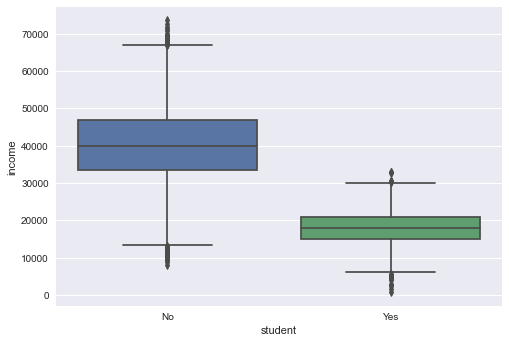

In [17]:
sns.boxplot(data = df, x = 'student', y = 'income')

<AxesSubplot:xlabel='default', ylabel='balance'>

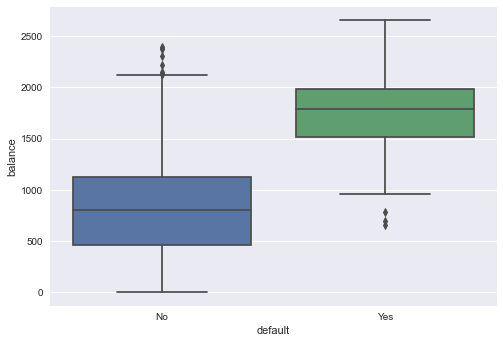

In [18]:
sns.boxplot(data = df, x = 'default', y = 'balance')

<AxesSubplot:xlabel='default', ylabel='income'>

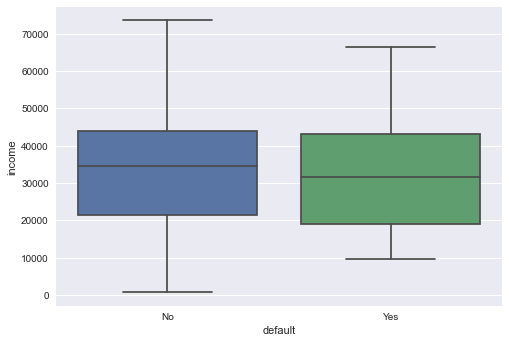

In [19]:
sns.boxplot(data = df, x = 'default', y = 'income')

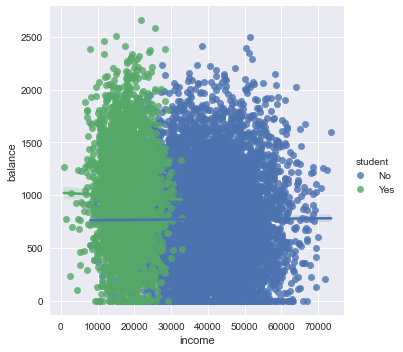

In [20]:
sns.lmplot('income', 'balance', data = df, hue = 'student')

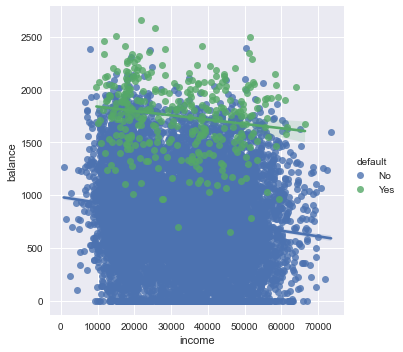

In [21]:
sns.lmplot('income', 'balance', data = df, hue = 'default')

### Desafío 3: Modelación econométrica

* Recodifique las variables student y default para que adquieran atributos numéricos.
* Implemente el siguiente modelo econométrico:

$$  log \left(\dfrac{Pr(default = 1)}{1 - Pr(default = 1)} \right)= \beta_0 + \beta_1 \times balance + \beta_2 \times income + \beta_3 \times student$$

* A partir de este modelo, depúrelo y mantenga las principales características. Ejecute de nuevo el modelo y comente brevemente sobre el comportamiento de los atributos.


In [22]:
# recodificación variables categoricas
for col in ['student', 'default']:
        df[col] = df[col].replace(['No', 'Yes'], [0, 1])

In [23]:
modelo_1 = smf.logit('default ~ balance + income + student', data = df).fit()
modelo_1.summary()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Thu, 22 Sep 2022   Pseudo R-squ.:                  0.4619
Time:                        23:16:24   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                3.257e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.8690      0.492    -22.079      0.000     -11.834      -9.904
balance        0.0057      0.000     24.737      0.000       0.005       0.006
income      3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
student       -0.6468      0.236     -2.738      0.006      -1.110      -0.184
==============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [24]:
# dejamos solo variables significativas
modelo_2 = smf.logit('default ~ balance + student', data = df).fit()
modelo_2.summary()

Optimization terminated successfully.
         Current function value: 0.078584
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Thu, 22 Sep 2022   Pseudo R-squ.:                  0.4619
Time:                        23:16:24   Log-Likelihood:                -785.84
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                1.189e-293
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.7495      0.369    -29.115      0.000     -11.473     -10.026
balance        0.0057      0.000     24.748      0.000       0.005       0.006
student       -0.7149      0.148     -4.846      0.000      -1.004      -0.426
==============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

#### Desafío 4: Entrenar

A partir del modelo depurado, genere un modelo predictivo con las siguientes características:
* Genera subconjuntos de entrenamiento y pruebas, separando el 33% de la muestra en el conjunto de pruebas.
* Estandarice las matrices de atributos de entrenamiento y pruebas usando StandardScaler() ajustado solo sobre el conjunto de entrenamiento.
* Implemente el modelo sin alterar los hiper parámetros.
* Genere la predicción de las clases y de la probabilidad.
* Reporte las métricas de precisión, recall y f1 para ambas clases.
* Grafique la curva Receiver Operator Characteristic.
* En base a los pasos, comente sobre el desempeño predictivo del modelo haciendo mención a todas las métricas calculadas y a la curva ROC.


In [25]:
# dataframe con variables significativas
df_significant = df.drop('income', axis=1)

In [26]:
# separando matriz de atributos de vector objetivo
mat_atr = df_significant.loc[:, ['student', 'balance']]
vec_obj = df_significant['default']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(mat_atr, vec_obj, test_size=.33, random_state=15820)

In [28]:
# estandarizamos conjunto de entrenamiento
X_train_std = StandardScaler().fit_transform(X_train)

In [29]:
# implemente el modelo sin alterar hiperparámetros
modelo_3 =  LogisticRegression().fit(X_train_std, y_train)

In [30]:
# predicciones
y_hat = modelo_3.predict(X_test)
prob_yhat = modelo_3.predict_proba(X_test)[:, 1]
y_hat, prob_yhat

(array([1, 1, 1, ..., 1, 1, 1], dtype=int64),
 array([1., 1., 1., ..., 1., 1., 1.]))

In [31]:
# metricas de desempeño

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       1.00      0.05      0.10      3194
           1       0.03      1.00      0.07       106

    accuracy                           0.08      3300
   macro avg       0.52      0.53      0.08      3300
weighted avg       0.97      0.08      0.10      3300



In [32]:
# curva roc
false_positive, true_positive, threshold = roc_curve(y_test, y_hat)

Text(0.5, 0, 'Falsos Positivos')

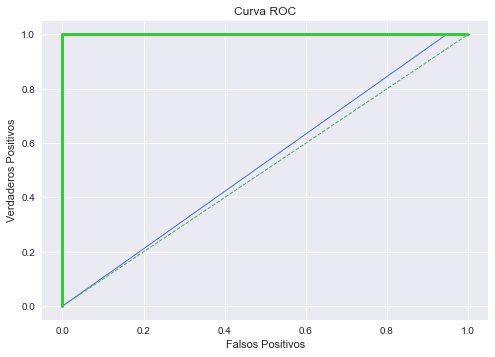

In [33]:
# grafico roc
plt.title('Curva ROC')
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1)
plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), plt.plot([1, 1], c='limegreen', lw=3)
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos')